In [18]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_name = "t5-small"
model_t5 = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer_t5 = T5Tokenizer.from_pretrained(model_name)

def infer_t5(input_text, command="translate to french"):
    prompt = f"{command}: {input_text}"
    input_ids = tokenizer_t5.encode(prompt, return_tensors="pt")
    output_ids = model_t5.generate(input_ids, max_new_tokens=1000)
    output_text = tokenizer_t5.decode(output_ids[0], skip_special_tokens=True)
    return output_text


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
from transformers import MarianMTModel, MarianTokenizer

model_name = "Helsinki-NLP/opus-mt-en-roa"
tokenizer_marian = MarianTokenizer.from_pretrained(model_name)
model_marian = MarianMTModel.from_pretrained(model_name)

def infer_marian(input_text, command="translate to french"):
    src_text = [f">>fra<<{input_text}"]
    output_ids = model_marian.generate(**tokenizer_marian(src_text, return_tensors="pt", padding=True))
    output_text = tokenizer_marian.decode(output_ids[0], skip_special_tokens=True)
    return output_text


In [7]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

model_name = 'facebook/mbart-large-50-many-to-many-mmt'
model_mbart = MBartForConditionalGeneration.from_pretrained(model_name)
tokenizer_mbart = MBart50TokenizerFast.from_pretrained(model_name)

def infer_mbart(input_text, command="translate to french"):
    tokenizer_mbart.src_lang = "en_XX"
    encoded_hi = tokenizer_mbart(input_text, return_tensors="pt")
    generated_tokens = model_mbart.generate(
        **encoded_hi,
        forced_bos_token_id=tokenizer_mbart.lang_code_to_id["fr_XX"]
    )
    return tokenizer_mbart.batch_decode(generated_tokens, skip_special_tokens=True)[0]

In [55]:
import requests 
import pandas as pd

dataset = [] 
for index in range(0, 100, 100):
    url = f"https://datasets-server.huggingface.co/rows?dataset=giga_fren&config=en-fr&split=train&offset={index}&length=100"
    response = requests.get(url)
    data = response.json()
    for row in data["rows"]:
        x = row["row"]["translation"]["en"]
        y = row["row"]["translation"]["fr"]
        dataset.append((x, y))
    print(f"Downloaded {index + 100} rows")
df = pd.DataFrame(dataset, columns=["input_text", "target_text"])
df.head()
df.to_csv("giga_fren.csv", index=False)

Downloaded 100 rows


In [57]:
df = pd.read_csv("giga_fren.csv")

for index, row in df.iterrows():
    df.loc[index, "t5"] = infer_t5(row["input_text"])
    if index % 10 == 0:
        print(f"Translated {index} rows for t5")      

df.head()

Translated 0 rows for t5
Translated 10 rows for t5
Translated 20 rows for t5
Translated 30 rows for t5
Translated 40 rows for t5
Translated 50 rows for t5
Translated 60 rows for t5
Translated 70 rows for t5
Translated 80 rows for t5
Translated 90 rows for t5


,input_text,target_text,t5
0,Changing Lives _BAR_ Changing Society _BAR_ Ho...,Il a transformé notre vie _BAR_ Il a transform...,Changing Lives _BAR_ Changing Society _BAR_ Ho...
1,Site map,Plan du site,Plan du site
2,Feedback,Rétroaction,Commentaires
3,Credits,Crédits,Crédits
4,Français,English,Français


In [59]:
for index, row in df.iterrows():
    df.loc[index, "marian"] = infer_marian(row["input_text"])
    if index % 10 == 0:
        print(f"Translated {index} rows for marian")

df.head()

Translated 0 rows for marian
Translated 10 rows for marian
Translated 20 rows for marian
Translated 30 rows for marian
Translated 40 rows for marian
Translated 50 rows for marian
Translated 60 rows for marian
Translated 70 rows for marian
Translated 80 rows for marian
Translated 90 rows for marian


,input_text,target_text,t5,marian
0,Changing Lives _BAR_ Changing Society _BAR_ Ho...,Il a transformé notre vie _BAR_ Il a transform...,Changing Lives _BAR_ Changing Society _BAR_ Ho...,Changement de vie _BAR_ Changement de société ...
1,Site map,Plan du site,Plan du site,Carte du site
2,Feedback,Rétroaction,Commentaires,Rétroactions
3,Credits,Crédits,Crédits,Crédits
4,Français,English,Français,English


In [60]:
for index, row in df.iterrows():
    df.loc[index, "mbart"] = infer_mbart(row["input_text"])
    if index % 10 == 0:
        print(f"Translated {index} rows for mbart")
    
df.head()

Translated 0 rows for mbart
Translated 10 rows for mbart
Translated 20 rows for mbart
Translated 30 rows for mbart
Translated 40 rows for mbart
Translated 50 rows for mbart
Translated 60 rows for mbart
Translated 70 rows for mbart
Translated 80 rows for mbart
Translated 90 rows for mbart


,input_text,target_text,t5,marian,mbart
0,Changing Lives _BAR_ Changing Society _BAR_ Ho...,Il a transformé notre vie _BAR_ Il a transform...,Changing Lives _BAR_ Changing Society _BAR_ Ho...,Changement de vie _BAR_ Changement de société ...,Changing Lives _BAR_ Changing Society _BAR_ Ho...
1,Site map,Plan du site,Plan du site,Carte du site,Carte du site
2,Feedback,Rétroaction,Commentaires,Rétroactions,Rétroaction
3,Credits,Crédits,Crédits,Crédits,Crédits
4,Français,English,Français,English,English (en anglais seulement)


In [61]:
df.to_csv("giga_fren_translated.csv", index=False)
df = pd.read_csv("giga_fren_translated.csv")
df.head()

,input_text,target_text,t5,marian,mbart
0,Changing Lives _BAR_ Changing Society _BAR_ Ho...,Il a transformé notre vie _BAR_ Il a transform...,Changing Lives _BAR_ Changing Society _BAR_ Ho...,Changement de vie _BAR_ Changement de société ...,Changing Lives _BAR_ Changing Society _BAR_ Ho...
1,Site map,Plan du site,Plan du site,Carte du site,Carte du site
2,Feedback,Rétroaction,Commentaires,Rétroactions,Rétroaction
3,Credits,Crédits,Crédits,Crédits,Crédits
4,Français,English,Français,English,English (en anglais seulement)


In [62]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

def calculate_bleu(reference, candidate):
    return corpus_bleu([[reference]], [candidate], smoothing_function=SmoothingFunction().method1)

df["bleu_t5"] = df.apply(lambda i: calculate_bleu(i["target_text"], i["t5"]), axis=1,)

df["bleu_marian"] = df.apply(lambda i: calculate_bleu(i["target_text"], i["marian"]), axis=1)

df["bleu_mbart"] = df.apply(lambda x: calculate_bleu(x["target_text"], x["mbart"]), axis=1)

df.head()

,input_text,target_text,t5,marian,mbart,bleu_t5,bleu_marian,bleu_mbart
0,Changing Lives _BAR_ Changing Society _BAR_ Ho...,Il a transformé notre vie _BAR_ Il a transform...,Changing Lives _BAR_ Changing Society _BAR_ Ho...,Changement de vie _BAR_ Changement de société ...,Changing Lives _BAR_ Changing Society _BAR_ Ho...,0.454065,0.674687,0.513653
1,Site map,Plan du site,Plan du site,Carte du site,Carte du site,1.000000,0.576084,0.576084
2,Feedback,Rétroaction,Commentaires,Rétroactions,Rétroaction,0.026658,0.903602,1.000000
3,Credits,Crédits,Crédits,Crédits,Crédits,1.000000,1.000000,1.000000
4,Français,English,Français,English,English (en anglais seulement),0.065006,1.000000,0.189043


In [64]:
# calculate average bleu score higher is better
print(f"Average BLEU score for T5: {df['bleu_t5'].mean()}")
print(f"Average BLEU score for Marian: {df['bleu_marian'].mean()}")
print(f"Average BLEU score for MBart: {df['bleu_mbart'].mean()}")

# calculate median bleu score higher is better
print(f"Median BLEU score for T5: {df['bleu_t5'].median()}")
print(f"Median BLEU score for Marian: {df['bleu_marian'].median()}")
print(f"Median BLEU score for MBart: {df['bleu_mbart'].median()}")

# calculate standard deviation lower is better
print(f"Standard deviation for T5: {df['bleu_t5'].std()}")
print(f"Standard deviation for Marian: {df['bleu_marian'].std()}")
print(f"Standard deviation for MBart: {df['bleu_mbart'].std()}")

# calculate variance lower is better
print(f"Variance for T5: {df['bleu_t5'].var()}")
print(f"Variance for Marian: {df['bleu_marian'].var()}")
print(f"Variance for MBart: {df['bleu_mbart'].var()}")

Average BLEU score for T5: 0.6816516245310348
Average BLEU score for Marian: 0.7032052355572975
Average BLEU score for MBart: 0.7076347558959555
Median BLEU score for T5: 0.7010592662743498
Median BLEU score for Marian: 0.7155576548415923
Median BLEU score for MBart: 0.7067694600587531
Standard deviation for T5: 0.19484410251190873
Standard deviation for Marian: 0.1703051968754916
Standard deviation for MBart: 0.17120738199501923
Variance for T5: 0.0379642242836712
Variance for Marian: 0.029003860082799947
Variance for MBart: 0.02931196764958843


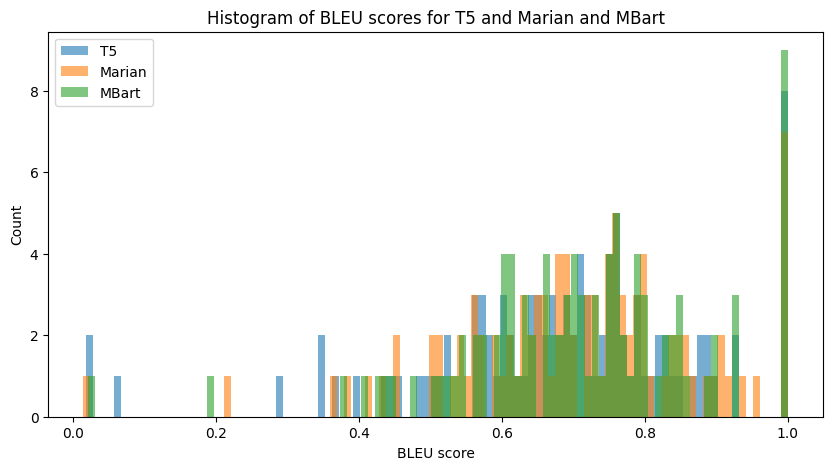

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df["bleu_t5"], bins=100, alpha=.6, label="T5")
plt.hist(df["bleu_marian"], bins=100, alpha=.6, label="Marian")
plt.hist(df["bleu_mbart"], bins=100, alpha=.6, label="MBart")
plt.legend()
plt.title("Histogram of BLEU scores for T5 and Marian and MBart")
plt.xlabel("BLEU score")
plt.ylabel("Count")
plt.show()